## 支援向量機(Support Vector Machine)

假設要你用一個棍子將這兩顆不同顏色的球分開

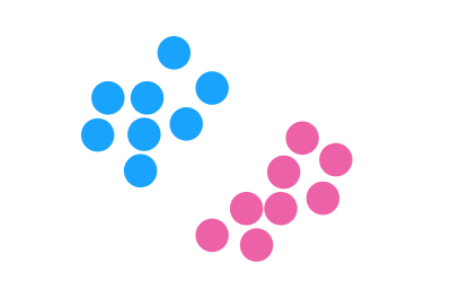

於是你使用Perceptron或是Logistic Regression順利找個一個放棍子的方法將這兩種不同顏色的球分開，

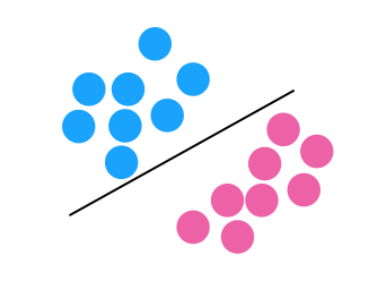

於是上帝又創造一些球出來，你發現原先棍子擺放位子很容易造成未來產生的球的分類錯誤

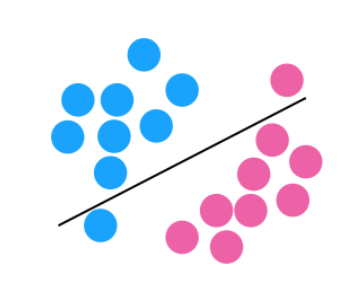

因此你發現應該要將棍子調整成這樣才能夠在更準確分類在未來產生的球（這就是SVM最主要的核心概念）

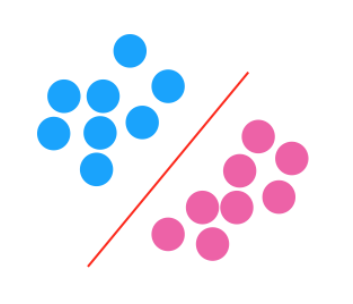



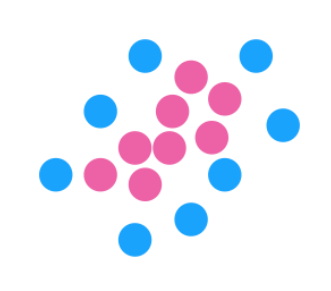
觀察一下後你發現紅球、藍球的質量不太一樣，這時你靈機一動，深呼吸一口氣，將你的查克拉聚集在手上，大力一拍桌子，讓這些球飛到空中，你再拿一張白紙將將些球分開

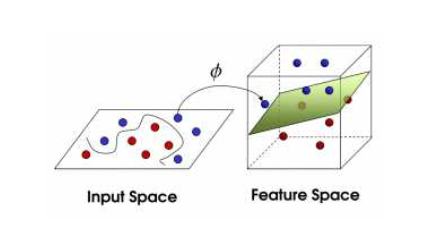

#### 從正上方的視角來看這藍球跟紅球就像是被一條虛擬的線分開了

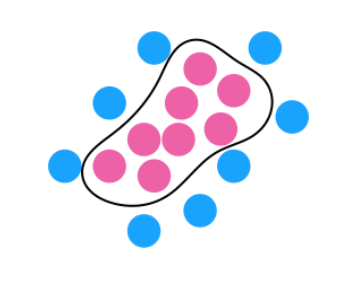

https://www.youtube.com/watch?time_continue=42&v=3liCbRZPrZA



那SVM是怎麼得到那條很好的線呢？以直線來說，首先紅色的線會創造兩條黑色平行於紅色線的虛線，並讓黑線平移碰到最近的一個點，紅線到黑線的距離稱為Margin，而SVM就是透過去找Margin最大的那個紅線，來找最好的線

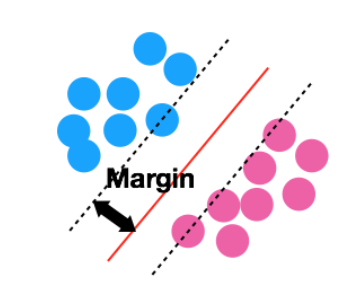

那要怎麼讓Margin最大呢？

假設紅線是w*x = 0 在紅線上方的區域就是w*x >0 紅線下方的區域就是w*x <0。

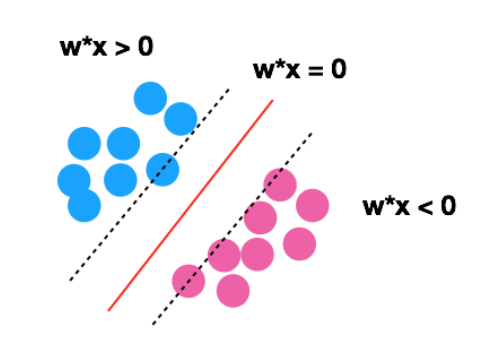

同理類推來看在左邊虛線上方的區域是w*x>k 在右邊虛線下方的區域是w*x<k，虛線中間不會有資料點。

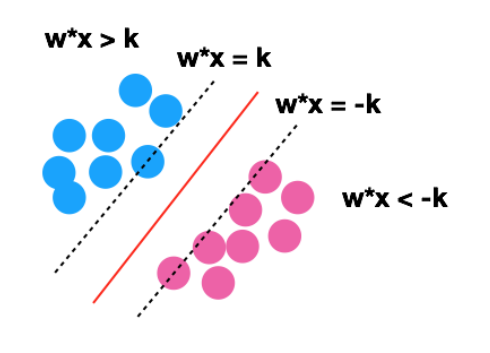

虛線上的點X1,X2 其實就是所謂的支援向量(Support vector)，我們主要是利用支援向量來算出Margin，並最大化Margin。那要怎麼計算margin呢？ 利用高中數學的知識將X1向量-X2向量得到的向量投影到W就可以了！接下來就是在Y*(W*X) ≥k 的條件下(虛線中間沒有點)，來最大化margin 。

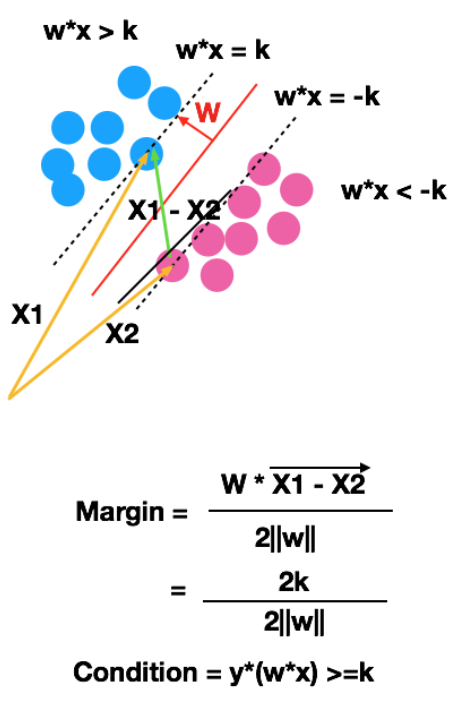

## 載入Iris資料集

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


## 將資料分為Train以及Test並將特徵標準化

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 載入SVM中的SVC，並將kernel設為線性（SVM的Kernel可以換成非線性），並將Probability設為True

In [7]:
from sklearn.svm import SVC

In [8]:
svm = SVC(kernel='linear', probability=True)

In [9]:
svm.fit(X_train_std,y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 以test data來檢驗預測結果也都是100%全對

In [10]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [11]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [12]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [13]:
svm.predict_proba(X_test_std)

array([[0.94942357, 0.05057643],
       [0.00796169, 0.99203831],
       [0.97352369, 0.02647631],
       [0.00687632, 0.99312368],
       [0.01757507, 0.98242493],
       [0.12063918, 0.87936082],
       [0.98409362, 0.01590638],
       [0.00514983, 0.99485017],
       [0.00919644, 0.99080356],
       [0.0163332 , 0.9836668 ],
       [0.02505604, 0.97494396],
       [0.03100304, 0.96899696],
       [0.00854758, 0.99145242],
       [0.9801776 , 0.0198224 ],
       [0.96202859, 0.03797141],
       [0.94167769, 0.05832231],
       [0.98809309, 0.01190691],
       [0.87561583, 0.12438417],
       [0.98022152, 0.01977848],
       [0.9561144 , 0.0438856 ],
       [0.94942357, 0.05057643],
       [0.0357037 , 0.9642963 ],
       [0.94938684, 0.05061316],
       [0.03830429, 0.96169571],
       [0.96711456, 0.03288544],
       [0.96943452, 0.03056548],
       [0.96200076, 0.03799924],
       [0.02174029, 0.97825971],
       [0.04105685, 0.95894315],
       [0.00640896, 0.99359104]])

In [14]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,2])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [15]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [21]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([1,2])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1


In [22]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std_1 = sc.transform(X_train_1)
X_test_std_1 = sc.transform(X_test_1)
X_train_std_2 = sc.transform(X_train_2)
X_test_std_2 = sc.transform(X_test_2)

## 可以明顯看到SVM所切出來的線漂亮許多

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

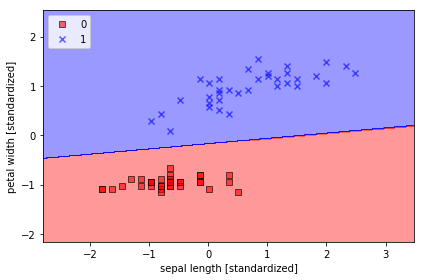

In [19]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

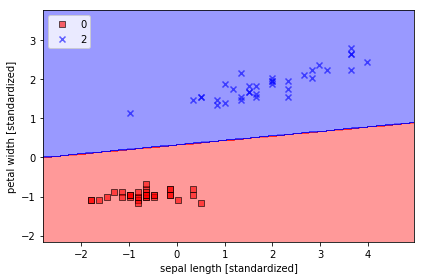

In [27]:
svm_1 = SVC(kernel='linear', probability=True)
svm_1.fit(X_train_std_1,y_train_1['target'].values)
plot_decision_regions(X_train_std_1, y_train_1['target'].values, classifier=svm_1)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

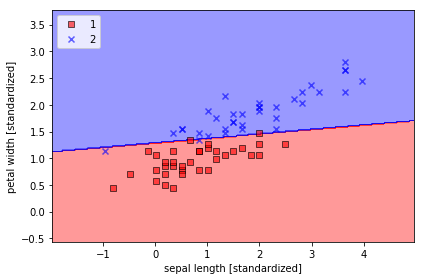

In [28]:
svm_2 = SVC(kernel='linear', probability=True)
svm_2.fit(X_train_std_2,y_train_2['target'].values)
plot_decision_regions(X_train_std_2, y_train_2['target'].values, classifier=svm_2)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()